<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/praktikummandiri12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum12"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv(f"{path}/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns=["id", "Unnamed: 32"])

In [ ]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


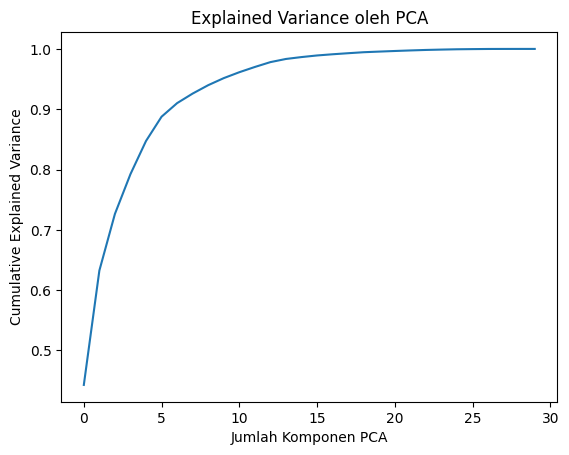

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance oleh PCA")
plt.show()


In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

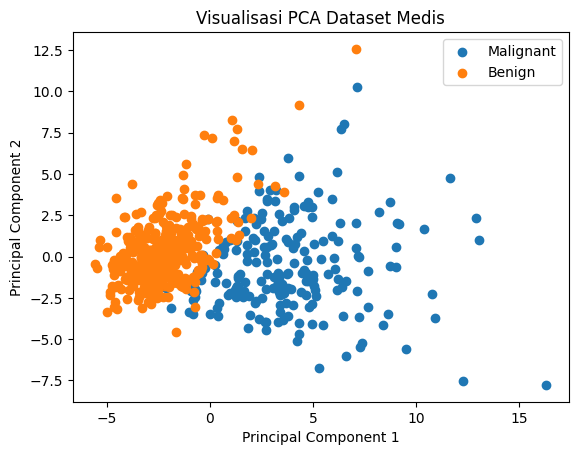

In [ ]:
plt.figure()
plt.scatter(X_pca_2[y == "M", 0], X_pca_2[y == "M", 1], label="Malignant")
plt.scatter(X_pca_2[y == "B", 0], X_pca_2[y == "B", 1], label="Benign")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("Visualisasi PCA Dataset Medis")
plt.show()

In [ ]:
pca_components = pd.DataFrame(
    pca_2.components_,
    columns=X.columns,
    index=["PC1", "PC2"]
)

print("Kontribusi fitur terhadap PC1 dan PC2:")
print(pca_components.T.sort_values(by="PC1", ascending=False).head())

Kontribusi fitur terhadap PC1 dan PC2:
                           PC1       PC2
concave points_mean   0.260854 -0.034768
concavity_mean        0.258400  0.060165
concave points_worst  0.250886 -0.008257
compactness_mean      0.239285  0.151892
perimeter_worst       0.236640 -0.199878
